# CUSTOMER RETENTION

# PROBLEM STATEMENT:

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. 

The research further more investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

# DATA:
            
            There are two sheets (one is detailed) and second is encoded in the excel file. 

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import chi2_contingency, chi2
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# LOADING THE DATA

In [2]:
# uploading train and test data.

df= pd.read_excel("customer_retention_dataset.xlsx")

In [3]:
# Display data sample.
df.head().T

,0,1,2,3,4
1Gender of respondent,Male,Female,Female,Male,Female
2 How old are you?,31-40 years,21-30 years,21-30 years,21-30 years,21-30 years
3 Which city do you shop online from?,Delhi,Delhi,Greater Noida,Karnal,Bangalore
4 What is the Pin Code of where you shop online from?,110009,110030,201308,132001,530068
5 Since How Long You are Shopping Online ?,Above 4 years,Above 4 years,3-4 years,3-4 years,2-3 years
...,...,...,...,...,...
Longer delivery period,Paytm.com,Snapdeal.com,Paytm.com,Paytm.com,Paytm.com
Change in website/Application design,Flipkart.com,Amazon.in,Paytm.com,"Amazon.in, Flipkart.com",Amazon.in
Frequent disruption when moving from one page to another,Amazon.in,Myntra.com,Paytm.com,"Amazon.in, Flipkart.com",Snapdeal.com
Website is as efficient as before,Amazon.in,"Amazon.in, Flipkart.com",Amazon.in,"Amazon.in, Flipkart.com, Paytm.com",Paytm.com


In [4]:
#Display all columns

df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [5]:
# Changing column names as headings are more like questions and lengthy.

def new_column_names(data):
    
    columns = list(data.columns)
    for col in columns:
        indx = columns.index(col)
        
        if indx == 0:
            data.rename(columns = {'1Gender of respondent' : 'Gender'}, inplace = True)
        elif indx == 1:
            data.rename(columns = {'2 How old are you? ' : 'Age'}, inplace = True)
        elif indx == 2:
            data.rename(columns = {'3 Which city do you shop online from?': 'City'}, inplace = True)
        elif indx == 3:
            data.rename(columns = {'4 What is the Pin Code of where you shop online from?' : 'Pin code'}, inplace = True)
        elif indx == 4:
            data.rename(columns = {'5 Since How Long You are Shopping Online ?': 'Since_shop_on'}, inplace = True)
        elif indx == 5:
            data.rename(columns = {'6 How many times you have made an online purchase in the past 1 year?': 'times_onlin_pur'}, inplace = True)
        elif indx == 6:
            data.rename(columns = {'7 How do you access the internet while shopping on-line?' : 'access_internet'}, inplace = True)
        elif indx == 7:
            data.rename(columns = {'8 Which device do you use to access the online shopping?': 'Device'}, inplace = True)
        elif indx == 8:
            data.rename(columns = {'9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ': 'Screen_size'}, inplace = True)
        elif indx == 9:
            data.rename(columns = {'10 What is the operating system (OS) of your device?\t\t\t\t                                          ':'OS'},inplace = True)
        elif indx == 10:
            data.rename(columns = {'11 What browser do you run on your device to access the website?\t\t\t                                                          ': 'Browser'},inplace = True)
        elif indx == 11:
            data.rename(columns = {'12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ': 'Chnl_to_website'}, inplace = True)
        elif indx == 12:
            data.rename(columns = {'13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ':'reach_store'}, inplace = True)
        elif indx == 13:
            data.rename(columns = {'14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ':'time_spent_bfore_deci'}, inplace = True)
        elif indx == 14:
            data.rename(columns = {'15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ': 'Payment_opt'}, inplace = True)
        elif indx == 15:
            data.rename(columns = {'16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ': 'leave_witout_payin'}, inplace = True)
        elif indx == 16:
            data.rename(columns = {'17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ':'Reason_abandon'},inplace = True)
        elif indx == 17:
            data.rename(columns = {'18 The content on the website must be easy to read and understand': 'Is_cont_easy_undrstnd'}, inplace = True)
        elif indx == 18:
            data.rename(columns = {'19 Information on similar product to the one highlighted  is important for product comparison': 'Info_prod_comp'}, inplace = True)
        elif indx == 19:
            data.rename(columns = {'20 Complete information on listed seller and product being offered is important for purchase decision.': 'Comp_info_liseller'}, inplace = True)
        elif indx == 20:
            data.rename(columns = {'21 All relevant information on listed products must be stated clearly':'relevant_info_prod'},inplace = True)
        elif indx == 21:
            data.rename(columns = {'22 Ease of navigation in website':'ez_navi_web'}, inplace = True)
        elif indx == 22:
            data.rename(columns = {'23 Loading and processing speed': 'load_speed'}, inplace = True)
        elif indx == 23:
            data.rename(columns = {'24 User friendly Interface of the website':'Usr_frd_interface'}, inplace = True)
        elif indx == 24:
            data.rename(columns = {'25 Convenient Payment methods': 'payin_method'}, inplace = True)
        elif indx == 25:
            data.rename(columns = {'26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time':'Trust_on_transac'}, inplace = True)
        elif indx == 26:
            data.rename(columns = {'27 Empathy (readiness to assist with queries) towards the customers': 'empathy_assist_queries'},inplace = True)
        elif indx == 27:
            data.rename(columns = {'28 Being able to guarantee the privacy of the customer': 'Guar_cust_privacy'}, inplace = True)
        elif indx == 28:
            data.rename(columns = {'29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)':'Response_sev_com'}, inplace = True)
        elif indx == 29:
            data.rename(columns = {'30 Online shopping gives monetary benefit and discounts':'ben_dis_shpon'}, inplace = True)
        elif indx == 30:
            data.rename(columns = {'31 Enjoyment is derived from shopping online': 'Enjy_shop'}, inplace = True)
        elif indx == 31:
            data.rename(columns = {'32 Shopping online is convenient and flexible':'Conv_flexi'},inplace = True)
        elif indx == 32:
            data.rename(columns = {'33 Return and replacement policy of the e-tailer is important for purchase decision': 'replace_policy_imp'},inplace = True)
        elif indx == 33:
            data.rename(columns = {'34 Gaining access to loyalty programs is a benefit of shopping online': 'gain_acc_loyal_prog'},inplace = True)
        elif indx == 34:
            data.rename(columns = {'35 Displaying quality Information on the website improves satisfaction of customers':'display_qual_info_sat'}, inplace = True)
        elif indx == 35:
            data.rename(columns = {'36 User derive satisfaction while shopping on a good quality website or application':'Usr_driv_sat_app'}, inplace = True)
        elif indx == 36:
            data.rename(columns = {'37 Net Benefit derived from shopping online can lead to users satisfaction':'Net_benf_on_usrsat'}, inplace = True)
        elif indx == 37:
            data.rename(columns = {'38 User satisfaction cannot exist without trust' : 'Usr_sat_ntexst_trst'}, inplace = True)
        elif indx == 38:
            data.rename(columns = {'39 Offering a wide variety of listed product in several category':'Off_widvar_prod'}, inplace = True)
        elif indx == 39:
            data.rename(columns = {'40 Provision of complete and relevant product information':'Prov_prod_info'}, inplace = True)
        elif indx == 40:
            data.rename(columns = {'41 Monetary savings': 'Money_savings'}, inplace = True)
        elif indx == 41:
            data.rename(columns = {'42 The Convenience of patronizing the online retailer':'con_pat_retlr'}, inplace = True)
        elif indx == 42:
            data.rename(columns = {'43 Shopping on the website gives you the sense of adventure':'sense_adven_shopon'}, inplace = True)
        elif indx == 43:
            data.rename(columns = {'44 Shopping on your preferred e-tailer enhances your social status':'enhSoc_shop_estore'}, inplace = True)
        elif indx == 44:
            data.rename(columns = {'45 You feel gratification shopping on your favorite e-tailer': 'gratif_shop_etailor'}, inplace = True)
        elif indx == 45:
            data.rename(columns = {'46 Shopping on the website helps you fulfill certain roles':'fullfill_roles'}, inplace = True)
        elif indx == 46:
            data.rename(columns = {'47 Getting value for money spent':'worth_of_money'}, inplace = True)
        elif indx == 47:
            data.rename(columns = {'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ':'onlin_reatl_shp_frm'}, inplace = True)
        elif indx == 48:
            data.rename(columns = {'Easy to use website or application':'easy_use_app'}, inplace = True)
        elif indx == 49:
            data.rename(columns = {'Visual appealing web-page layout':'visual_web_layout'}, inplace = True)
        elif indx == 50:
            data.rename(columns = {'Wild variety of product on offer':'variety_prod_off'}, inplace = True)
        elif indx == 51:
            data.rename(columns = {'Complete, relevant description information of products':'desc_info_prods'}, inplace = True)
        elif indx == 52:
            data.rename(columns = {'Fast loading website speed of website and application':'fast_loading'}, inplace =True)
        elif indx == 53:
            data.rename(columns = {'Reliability of the website or application':'reliab_website'}, inplace = True)
        elif indx == 54:
            data.rename(columns = {'Quickness to complete purchase':'Quick_comp'}, inplace = True)
        elif indx == 55:
            data.rename(columns = {'Availability of several payment options':'Avail_pay_opt'}, inplace = True)
        elif indx == 56:
            data.rename(columns = {'Speedy order delivery ':'speed_odr_del'}, inplace = True)
        elif indx == 57:
            data.rename(columns = {'Privacy of customers’ information': 'privacy_cust_info'}, inplace = True)
        elif indx == 58:
            data.rename(columns = {'Security of customer financial information':'security_cust_fin_info'}, inplace = True)
        elif indx == 59:
            data.rename(columns = {'Perceived Trustworthiness':'perceived_trust'}, inplace = True)
        elif indx == 60:
            data.rename(columns = {'Presence of online assistance through multi-channel':'presnce_onlin_assist'}, inplace = True)
        elif indx == 61:
            data.rename(columns = {'Longer time to get logged in (promotion, sales period)':'longer_tim_to_login'}, inplace = True)
        elif indx == 62:
            data.rename(columns = {'Longer time in displaying graphics and photos (promotion, sales period)':'longer_tim_disp_graphics'}, inplace = True)
        elif indx == 63:
            data.rename(columns = {'Late declaration of price (promotion, sales period)':'late_declr_price'}, inplace = True)
        elif indx == 64:
            data.rename(columns = {'Longer page loading time (promotion, sales period)':'lon_page_load_tim'}, inplace = True)
        elif indx == 65:
            data.rename(columns = {'Limited mode of payment on most products (promotion, sales period)':'limtd_mode_pay'}, inplace = True)
        elif indx == 66:
            data.rename(columns = {'Longer delivery period':'lon_delvry_period'}, inplace = True)
        elif indx == 67:
            data.rename(columns = {'Change in website/Application design':'chnge_in_app_des'}, inplace = True)
        elif indx == 68:
            data.rename(columns = {'Frequent disruption when moving from one page to another':'disrupt_frm_pag_mov'}, inplace = True)
        elif indx == 69:
            data.rename(columns = {'Website is as efficient as before':'web_is_eff_bfre'}, inplace = True)
        else:
            data.rename(columns = {'Which of the Indian online retailer would you recommend to a friend?':'Recommend'}, inplace = True)
    return data

In [6]:
#apply function on the dataset

df = new_column_names(df)
df.head()

,Gender,Age,City,Pin code,Since_shop_on,times_onlin_pur,access_internet,Device,Screen_size,OS,...,longer_tim_to_login,longer_tim_disp_graphics,late_declr_price,lon_page_load_tim,limtd_mode_pay,lon_delvry_period,chnge_in_app_des,disrupt_frm_pag_mov,web_is_eff_bfre,Recommend
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [7]:
# New column names

df.columns

Index(['Gender', 'Age', 'City', 'Pin code', 'Since_shop_on', 'times_onlin_pur',
       'access_internet', 'Device', 'Screen_size', 'OS', 'Browser',
       'Chnl_to_website', 'reach_store', 'time_spent_bfore_deci',
       'Payment_opt', 'leave_witout_payin', 'Reason_abandon',
       'Is_cont_easy_undrstnd', 'Info_prod_comp', 'Comp_info_liseller',
       'relevant_info_prod', 'ez_navi_web', 'load_speed', 'Usr_frd_interface',
       'payin_method', 'Trust_on_transac', 'empathy_assist_queries',
       'Guar_cust_privacy', 'Response_sev_com', 'ben_dis_shpon', 'Enjy_shop',
       'Conv_flexi', 'replace_policy_imp', 'gain_acc_loyal_prog',
       'display_qual_info_sat', 'Usr_driv_sat_app', 'Net_benf_on_usrsat',
       'Usr_sat_ntexst_trst', 'Off_widvar_prod', 'Prov_prod_info',
       'Money_savings', 'con_pat_retlr', 'sense_adven_shopon',
       'enhSoc_shop_estore', 'gratif_shop_etailor', 'fullfill_roles',
       'worth_of_money', 'onlin_reatl_shp_frm', 'easy_use_app',
       'visual_web_lay

# VISUALIZATION

# Ratio of gender in the data.

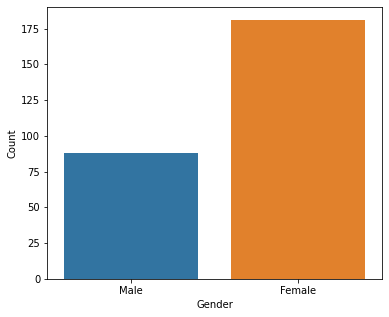

In [8]:
plt.figure(figsize = (6,5))
sns.countplot(df['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Observations:
    
1.Female count is more than double of male count.

2.Females shops more than males do as per the survey data.

# Shopping Ratio as per cities.

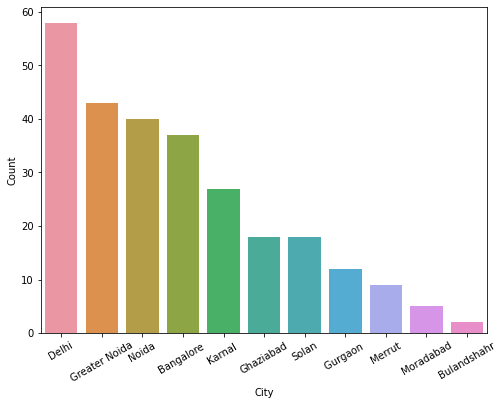

In [9]:
plt.figure(figsize = (8,6))
sns.countplot(df['City'], order = df['City'].value_counts().index)
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation = 30);

# Observations:
    
1.Delhi is the city from which maximum orders placed, which is due to the lifestyle of people living in the city.

2.Greater Noida, Noida, and Banglore follows in terms of online sales.

3.Least among all is Merrut, Moradabad, Bulandshire in sales as people. In these places doesn't follow fast moving lifestyle as industries and MNC's are less in these areas, Which makes people to adapt with local lifestyle than online shopping.

# Count of customers according according to Age.

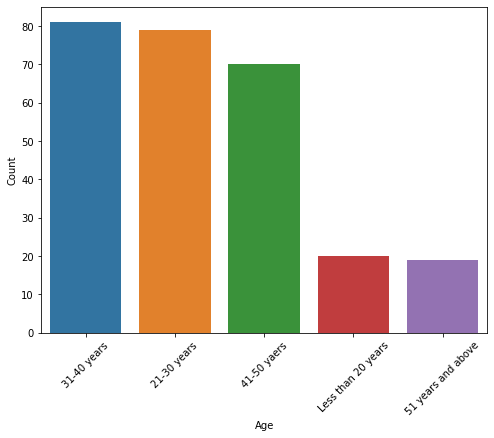

In [10]:
plt.figure(figsize = (8,6))
sns.countplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation = 45);

# Observations:
    
1.Highest number of customers are in range 31-40yrs.

2.However there is no great difference in sales from 21-50yrs, As this age range is the earning class and shops more.

3.Lowest number of customers are in the age range less than 20 and greater than 51yrs. Former category is majorly students and later is retired.

# Comparing the time taken for Online purchase.

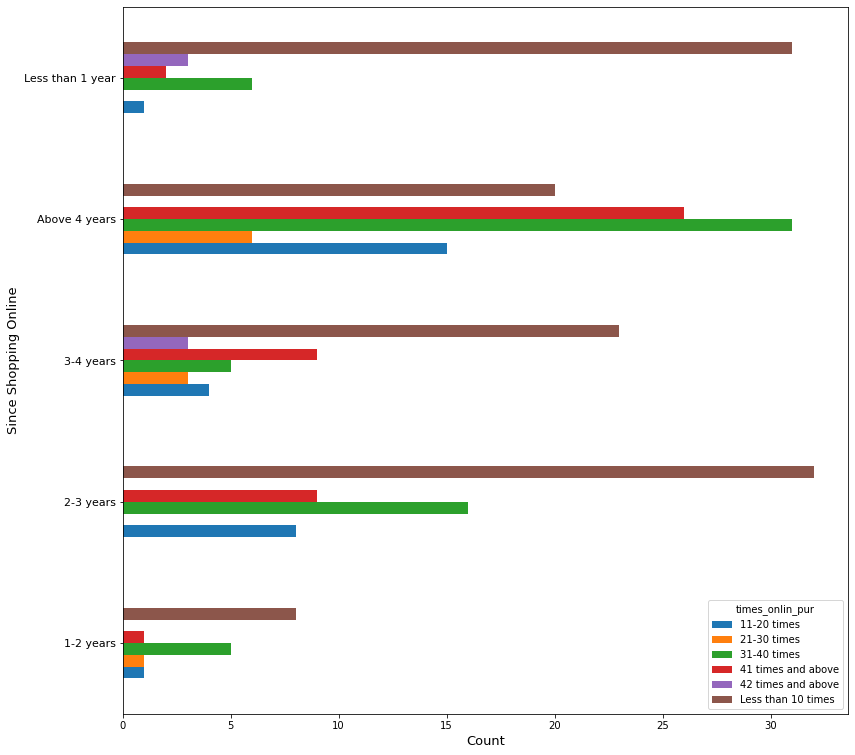

In [11]:
pd.crosstab(df['Since_shop_on'], df['times_onlin_pur']).plot.barh(figsize = (13, 13))
plt.xlabel('Count', fontsize = 13)
plt.ylabel('Since Shopping Online', fontsize = 13)
plt.yticks(fontsize = 11);

# Observations:
    
1.Customers who are purchasing more than 4yrs purchased more than 41times and above is the highest number.

2.Follows by customers who are purchasing from 3-4yrs.

3.Maximum customers who purchased less than 10 times are in the range purchasing from 2-3yrs; followed by less than 1 year.

# Comparison of Age and Reason for Abandoning purchase/Shopping Cart.

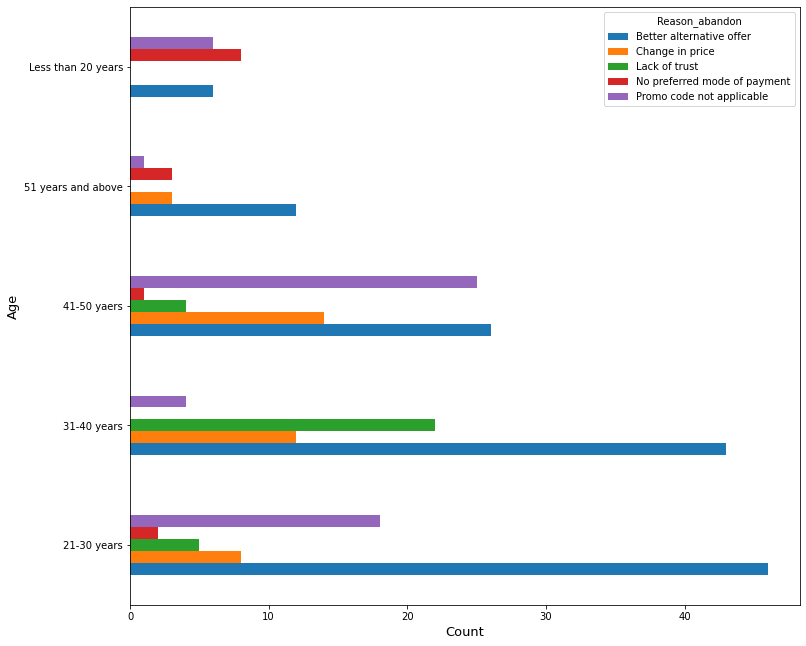

In [12]:
pd.crosstab(df['Age'], df['Reason_abandon']).plot.barh(figsize = (12,11))
plt.xlabel('Count', fontsize = 13)
plt.ylabel('Age', fontsize = 13);

# Observations:
    
1.Better Alternative Offer is the main reason for abandoning shopping cart in almost all age categories.

2.Customers of age range 21-40yrs are the one who browses a lot online and compare the price ranges.

3.No preffered payment mode is the least occured reason for abandoning shopping cart.

# Comparing the relation between the Time since shopping and Reason for Abandoning.

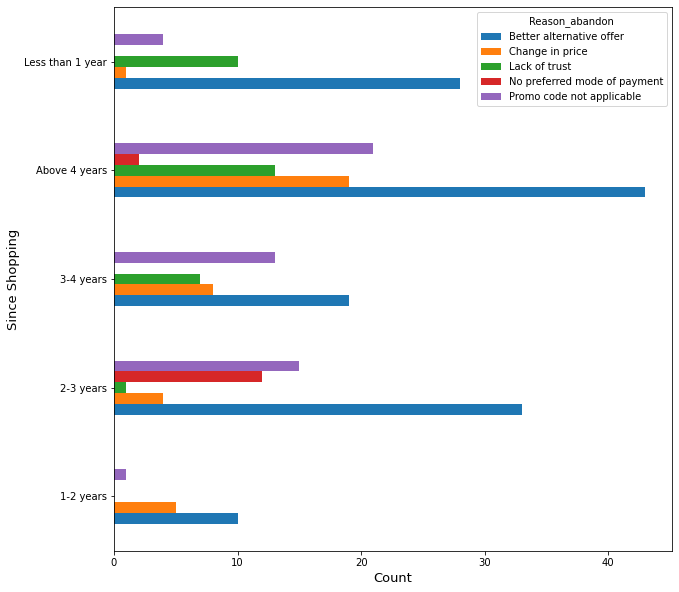

In [13]:
pd.crosstab(df['Since_shop_on'], df['Reason_abandon']).plot.barh(figsize = (10,10))
plt.xlabel('Count', fontsize = 13)
plt.ylabel('Since Shopping', fontsize = 13);

# Chi2 square for checking whether these variables are depend on each other or not.

In [14]:
pivot = pd.crosstab(df['Age'], df['Gender'])

In [15]:
stat, p, dof, expected = chi2_contingency(pivot)
print(f'degree of freedom is {dof}')
print(f'stats is {stat}')
print(f'p values id {p}')

degree of freedom is 4
stats is 4.964093342321093
p values id 0.29100162537226704


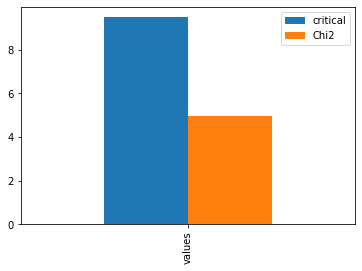

In [16]:
prob = 0.95
critical = chi2.ppf(prob, dof)
result = {'critical': critical, 'Chi2': stat}
result = pd.DataFrame(result, index = ['values'])
result.plot.bar();

# Observation:

We observe that chi2 value is less then critical value,there are dependence among these variables.

# Comparison of Age with Understanding the content of website.

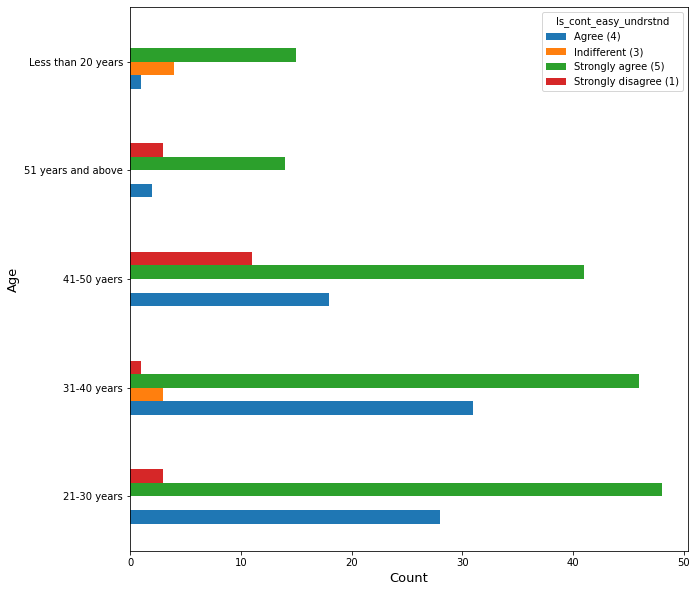

In [17]:
pd.crosstab(df['Age'], df['Is_cont_easy_undrstnd']).plot.barh(figsize = (10,10))
plt.xlabel('Count', fontsize = 13)
plt.ylabel('Age', fontsize = 13);

# Observation:

1.people with age 21-30 years are strongly agreeing for content should be easy to understand.

# Comparison on Age, Gender and Empathy on Assisting Querries.

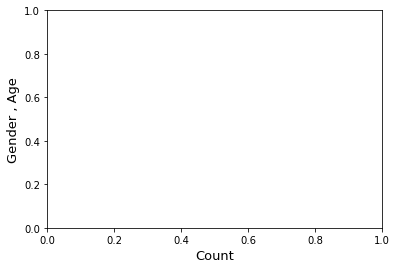

In [18]:
# pd.crosstab([df['Gender'], df['Age']], df['empathy_assist_queries']).plot.barh(figsize = (12,12))
plt.xlabel('Count', fontsize = 13)
plt.ylabel('Gender , Age', fontsize = 13);

# Observation:

Female with age 21-30 are strongly agree for Empathy (readiness to assist with queries) towards the customers.

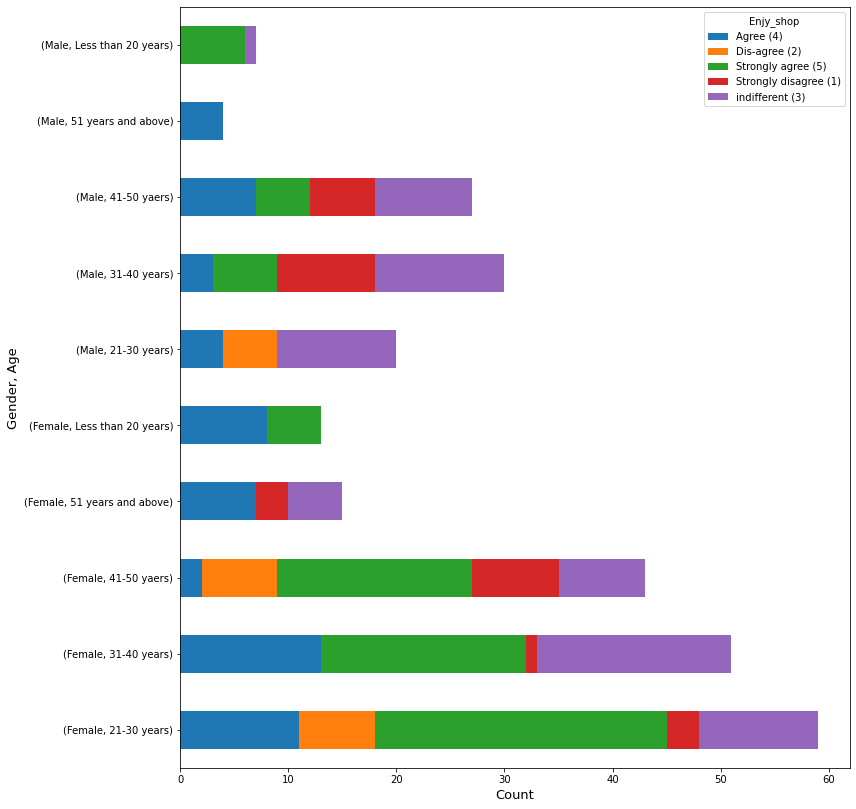

In [19]:
pd.crosstab([df['Gender'], df['Age']], df['Enjy_shop']).plot.barh(figsize = (12,14), stacked= True)
plt.xlabel('Count', fontsize = 13)
plt.ylabel('Gender, Age', fontsize = 13);

# Observation:

Female with age 21-30 are strongly agreeing that enjoying on online shopping.

# Comparison of Gender, Age and Internet loading speed.

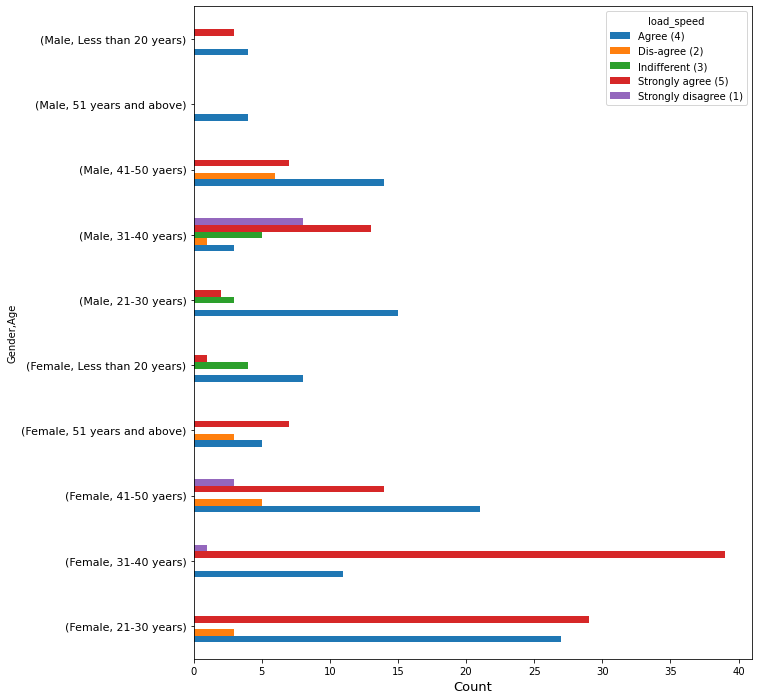

In [20]:
pd.crosstab([df['Gender'],df['Age']], df['load_speed']).plot.barh(figsize = (10,12))
plt.xlabel('Count', fontsize = 13)
plt.yticks(fontsize = 11);

# Observation:

Female with age 31-40 are strongly agreeing that load speed as a important factor.

# Comparison of Gender, Age and Display quality.

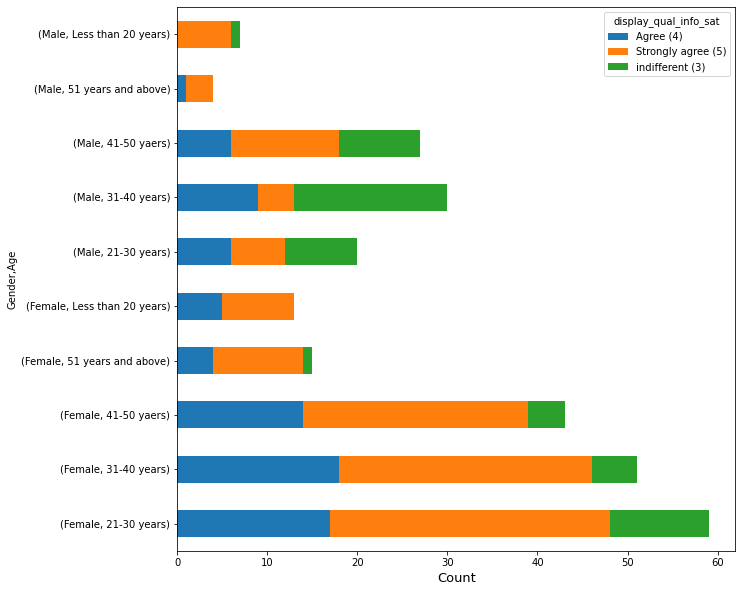

In [21]:
pd.crosstab([df['Gender'], df['Age']], df['display_qual_info_sat']).plot.barh(figsize = (10,10), stacked = True)
plt.xlabel('Count', fontsize = 13);

# Observation:

Female under age 21-30 are agreeing more for displaying the quality.

In [22]:
pd.crosstab([df['Gender'],df['Age']], df['onlin_reatl_shp_frm'], margins = True)

onlin_reatl_shp_frm        Amazon.in  Amazon.in, Flipkart.com  \
Gender Age                                                      
Female 21-30 years                 8                        8   
       31-40 years                 0                       15   
       41-50 yaers                 5                        1   
       51 years and above          0                        0   
       Less than 20 years          0                        0   
Male   21-30 years                 0                        3   
       31-40 years                 0                        5   
       41-50 yaers                 3                        0   
       51 years and above          0                        0   
       Less than 20 years          0                        0   
All                               16                       32   

onlin_reatl_shp_frm        Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com  \
Gender Age                                                                     
Female 21-30 years                                                        10   
       31-40 years                                                         3   
       41-50 yaers                                                         4   
       51 years and above                                                  7   
       Less than 20 years                                                  8   
Male   21-30 years                                                         1   
       31-40 years                                                         1   
       41-50 yaers                                                         4   
       51 years and above                                                  3   
       Less than 20 years                                                  3   
All                                                                       44   

onlin_reatl_shp_frm        Amazon.in, Flipkart.com, Paytm.com  \
Gender Age                                                      
Female 21-30 years                                          0   
       31-40 years                                          0   
       41-50 yaers                                          0   
       51 years and above                                   0   
       Less than 20 years                                   4   
Male   21-30 years                                          0   
       31-40 years                                          3   
       41-50 yaers                                          0   
       51 years and above                                   0   
       Less than 20 years                                   0   
All                                                         7   

onlin_reatl_shp_frm        Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com  \
Gender Age                                                                                
Female 21-30 years                                                        17              
       31-40 years                                                        25              
       41-50 yaers                                                        10              
       51 years and above                                                  4              
       Less than 20 years                                                  1              
Male   21-30 years                                                         7              
       31-40 years                                                         7              
       41-50 yaers                                                        10              
       51 years and above                                                  0              
       Less than 20 years                                                  1              
All                                                                       82              

onlin_reatl_shp_frm        Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com  \
Gend

# Count of Retail store in Datasets.

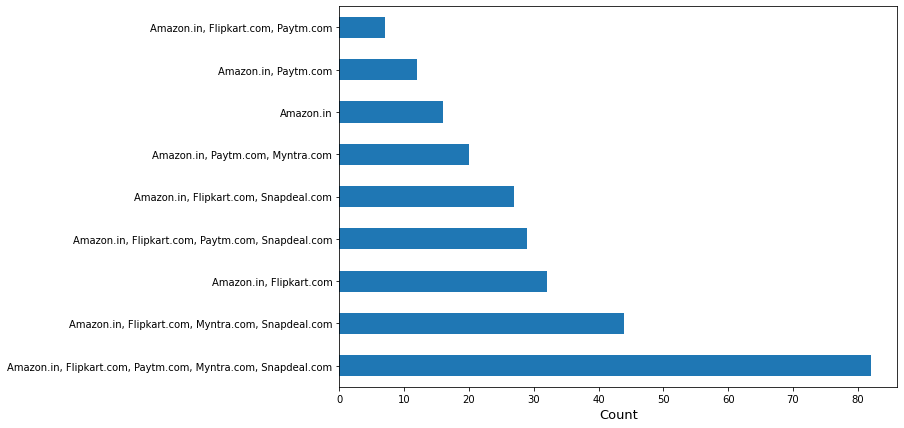

In [23]:
df['onlin_reatl_shp_frm'].value_counts().plot(kind = 'barh', figsize = (10,7))
plt.xlabel('Count', fontsize = 13);

# Observation:

Surprisingly people are using most of the platforms for online purchases instead of depending on just on only one site.

# Variables independency of device and screen size.

In [24]:
device_tim = pd.crosstab(df['Device'], df['times_onlin_pur'])
device_tim

times_onlin_pur,11-20 times,21-30 times,31-40 times,41 times and above,42 times and above,Less than 10 times
Device,,,,,,
Desktop,1,0,13,7,0,9
Laptop,12,6,14,10,0,44
Smartphone,12,4,28,30,6,61
Tablet,4,0,8,0,0,0


In [25]:
stat, p, dof, expected = chi2_contingency(device_tim)
print(f'degree of freedom is {dof}')
print(f'stats is {stat}')
print(f'p values id {p}')

degree of freedom is 15
stats is 49.038004229846884
p values id 1.7272959701139484e-05


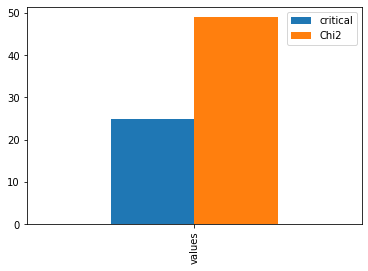

In [26]:
prob = 0.95
critical = chi2.ppf(prob, dof)
result = {'critical': critical, 'Chi2': stat}
result = pd.DataFrame(result, index = ['values'])
result.plot.bar();

# Observation:

As the chi2 value is more then critical value there is a significance dependence between device and time of online purchase.

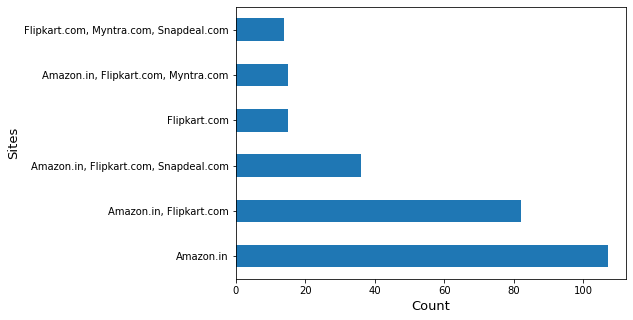

In [27]:
# Site which delivers the order fastly

df['speed_odr_del'].value_counts().plot.barh(figsize = (7,5))
plt.xlabel('Count', fontsize = 13)
plt.ylabel('Sites', fontsize = 13);

# Observation:

Amazon is on top in order delivery fast & speed.

# Plotting Sites and Delivery Speed.

In [28]:
shops = pd.crosstab(df['onlin_reatl_shp_frm'], df['speed_odr_del'])
shops

speed_odr_del,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Snapdeal.com",Flipkart.com,"Flipkart.com, Myntra.com, Snapdeal.com"
onlin_reatl_shp_frm,,,,,,
Amazon.in,16,0,0,0,0,0
"Amazon.in, Flipkart.com",5,19,0,0,8,0
"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com",0,15,15,0,0,14
"Amazon.in, Flipkart.com, Paytm.com",0,0,0,0,7,0
"Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com",46,11,0,25,0,0
"Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com",0,18,0,11,0,0
"Amazon.in, Flipkart.com, Snapdeal.com",8,19,0,0,0,0
"Amazon.in, Paytm.com",12,0,0,0,0,0
"Amazon.in, Paytm.com, Myntra.com",20,0,0,0,0,0


# Let's see, If people selecting sites to purchases are impacting on delivery speed.

In [29]:
stat, p, dof, expected = chi2_contingency(shops)
print(f'degree of freedom is {dof}')
print(f'stats is {stat}')
print(f'p values id {p}')

degree of freedom is 40
stats is 490.4318950886271
p values id 7.165785301206301e-79


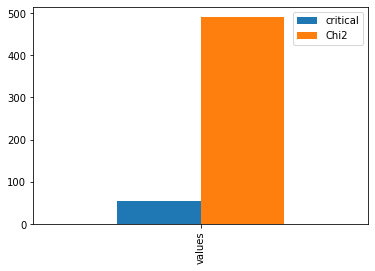

In [30]:
prob = 0.95
critical = chi2.ppf(prob, dof)
result = {'critical': critical, 'Chi2': stat}
result = pd.DataFrame(result, index = ['values'])
result.plot.bar();

# Observation:

As the chi2 value is more then critical value there is a significance dependence between choosing site and time for login.

# Let's observe that which sites are strongly recommended

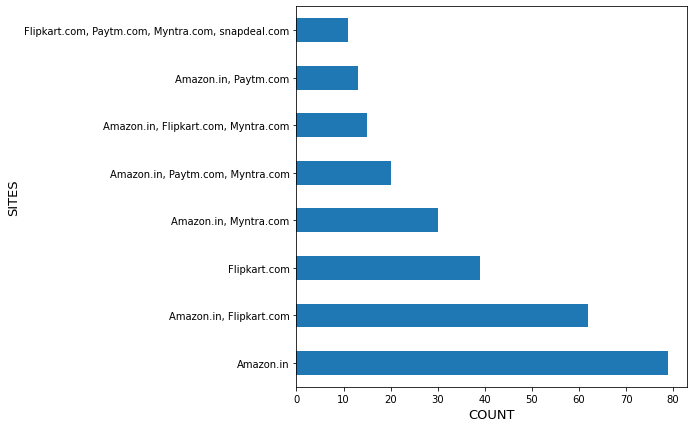

In [31]:
df['Recommend'].value_counts().plot.barh(figsize = (7,7))
plt.xlabel('COUNT', fontsize = 13)
plt.ylabel('SITES', fontsize = 13);

# Observation:

Amazon is highly recommended, When compared to flipkart.

In [32]:
recom = pd.crosstab(df['speed_odr_del'], df['Recommend'])
recom

Recommend,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
speed_odr_del,,,,,,,,
Amazon.in,47,0,0,15,13,20,12,0
"Amazon.in, Flipkart.com",11,37,0,15,0,0,19,0
"Amazon.in, Flipkart.com, Myntra.com",0,0,15,0,0,0,0,0
"Amazon.in, Flipkart.com, Snapdeal.com",0,25,0,0,0,0,0,11
Flipkart.com,7,0,0,0,0,0,8,0
"Flipkart.com, Myntra.com, Snapdeal.com",14,0,0,0,0,0,0,0


# CHECKING THEIR DEPENDENCY

In [33]:
stat, p, dof, expected = chi2_contingency(recom)
print(f'degree of freedom is {dof}')
print(f'stats is {stat}')
print(f'p values id {p}')

degree of freedom is 35
stats is 559.5687910398661
p values id 9.065945953119557e-96


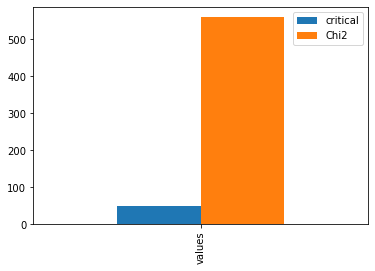

In [34]:
prob = 0.95
critical = chi2.ppf(prob, dof)
result = {'critical': critical, 'Chi2': stat}
result = pd.DataFrame(result, index = ['values'])
result.plot.bar();

# Obervation:

As the chi2 value is more then critical value there is a significance dependence between recommending site and speed delivery of order.

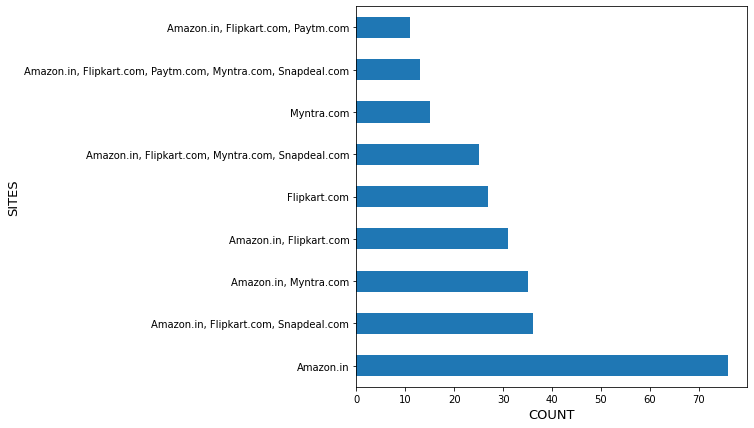

In [35]:
df['perceived_trust'].value_counts().plot.barh(figsize = (7,7))
plt.xlabel('COUNT', fontsize = 13)
plt.ylabel('SITES', fontsize = 13);

# Observation:

AMAZON has received more amount of trust, When compare to other sites.

# CHECKING FOR DEPENDENCY FOR RECOMMENDATION AND TRUST

In [36]:
trust = pd.crosstab(df['perceived_trust'],df['Recommend'])
trust

Recommend,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
perceived_trust,,,,,,,,
Amazon.in,42,19,15,0,0,0,0,0
"Amazon.in, Flipkart.com",5,7,0,0,0,0,19,0
"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com",14,11,0,0,0,0,0,0
"Amazon.in, Flipkart.com, Paytm.com",11,0,0,0,0,0,0,0
"Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com",0,0,0,0,13,0,0,0
"Amazon.in, Flipkart.com, Snapdeal.com",0,25,0,0,0,0,0,11
"Amazon.in, Myntra.com",0,0,0,15,0,20,0,0
Flipkart.com,7,0,0,0,0,0,20,0
Myntra.com,0,0,0,15,0,0,0,0


In [37]:
stat, p, dof, expected = chi2_contingency(trust)
print(f'degree of freedom is {dof}')
print(f'stats is {stat}')
print(f'p values id {p}')

degree of freedom is 56
stats is 939.550970270752
p values id 1.2847037251980906e-160


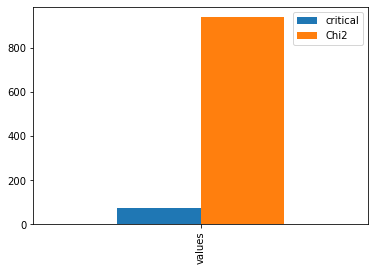

In [38]:
prob = 0.95
critical = chi2.ppf(prob, dof)
result = {'critical': critical, 'Chi2': stat}
result = pd.DataFrame(result, index = ['values'])
result.plot.bar();

# Observation:

As the chi2 value is more than critical value, There is a significance dependence between recommending site and perceived trust.

# Visualizing which site has less limited mode of payment.

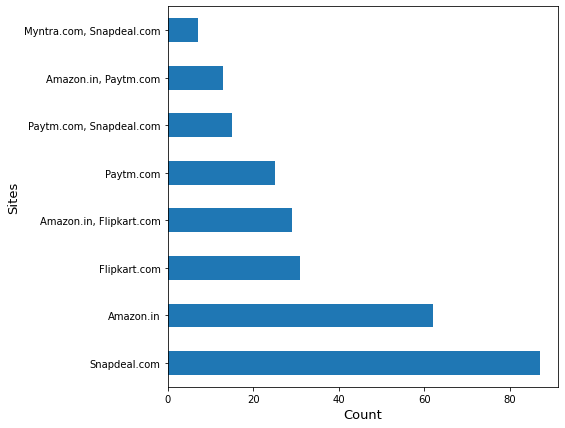

In [39]:
df['limtd_mode_pay'].value_counts().plot.barh(figsize = (7,7))
plt.xlabel('Count', fontsize = 13)
plt.ylabel('Sites',fontsize = 13);

# Observation:

It's clearly visualized that snapdeal has limited mode of payment.

# checking for dependencies of each limited mode of payment with recommending.

In [40]:
payment = pd.crosstab(df['limtd_mode_pay'], df['Recommend'])
payment

Recommend,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
limtd_mode_pay,,,,,,,,
Amazon.in,30,0,0,0,0,20,12,0
"Amazon.in, Flipkart.com",29,0,0,0,0,0,0,0
"Amazon.in, Paytm.com",0,0,0,0,13,0,0,0
Flipkart.com,12,0,0,0,0,0,8,11
"Myntra.com, Snapdeal.com",0,7,0,0,0,0,0,0
Paytm.com,0,25,0,0,0,0,0,0
"Paytm.com, Snapdeal.com",0,0,15,0,0,0,0,0
Snapdeal.com,8,30,0,30,0,0,19,0


In [41]:
stat, p, dof, expected = chi2_contingency(payment)
print(f'degree of freedom is {dof}')
print(f'stats is {stat}')
print(f'p values id {p}')

degree of freedom is 49
stats is 953.0835699613103
p values id 7.897334953205374e-168


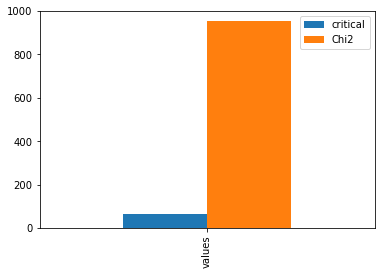

In [42]:
prob = 0.95
critical = chi2.ppf(prob, dof)

result = {'critical': critical, 'Chi2': stat}

result = pd.DataFrame(result, index = ['values'])
result.plot.bar();

# Observation:

As the chi2 value is more then critical value there is a significance dependence between recommending site and limited mode of payment.

# VISUALIZING THE SECURITY ON CUSTOMER INFO

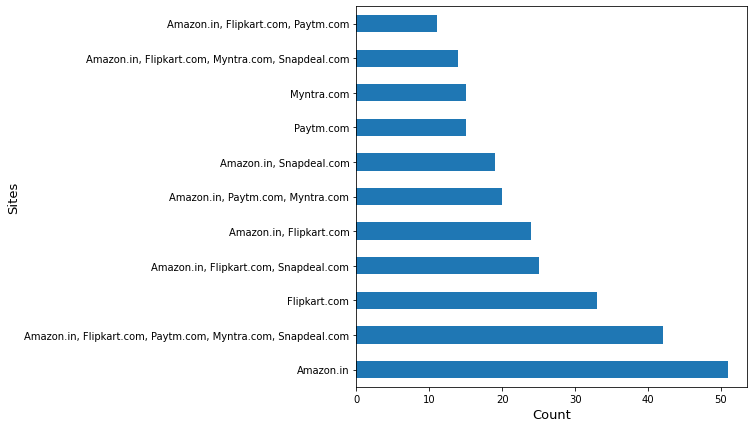

In [43]:
df['security_cust_fin_info'].value_counts().plot.barh(figsize = (7,7))
plt.xlabel('Count', fontsize = 13)
plt.ylabel('Sites', fontsize = 13);

# Observations:

1. Amazon is leading here for security payment.

2. Also all other sites have got more or less equal votes.

# CHECKING FOR DEPENDENCY OF ON EACH VARIABLES

In [44]:
info = pd.crosstab(df['security_cust_fin_info'], df['Recommend'])
info

Recommend,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
security_cust_fin_info,,,,,,,,
Amazon.in,24,0,15,0,0,0,12,0
"Amazon.in, Flipkart.com",5,0,0,0,0,0,19,0
"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com",14,0,0,0,0,0,0,0
"Amazon.in, Flipkart.com, Paytm.com",11,0,0,0,0,0,0,0
"Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com",0,18,0,0,13,0,0,11
"Amazon.in, Flipkart.com, Snapdeal.com",0,25,0,0,0,0,0,0
"Amazon.in, Paytm.com, Myntra.com",0,0,0,0,0,20,0,0
"Amazon.in, Snapdeal.com",0,19,0,0,0,0,0,0
Flipkart.com,25,0,0,0,0,0,8,0


In [45]:
stat, p, dof, expected = chi2_contingency(info)
print(f'degree of freedom is {dof}')
print(f'stats is {stat}')
print(f'p values id {p}')

degree of freedom is 70
stats is 1054.4266384574735
p values id 1.3817450273358843e-175


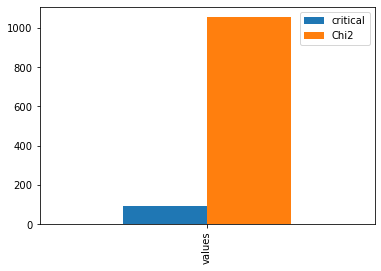

In [46]:
prob = 0.95
critical = chi2.ppf(prob, dof)
result = {'critical': critical, 'Chi2': stat}
result = pd.DataFrame(result, index = ['values'])
result.plot.bar();

# Observation:

As the chi2 value is more then critical value there is a significance dependence between recommending site and security on customer info.

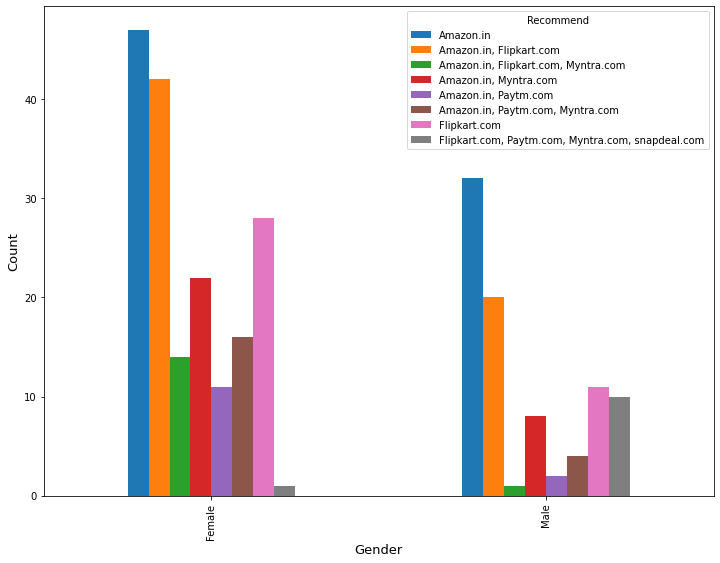

In [47]:
pd.crosstab(df['Gender'], df['Recommend']).plot.bar(figsize =(12,9))
plt.xlabel('Gender', fontsize = 13)
plt.ylabel('Count', fontsize = 13);

# Observation:
    
In both cases all are recommending amazon the most.

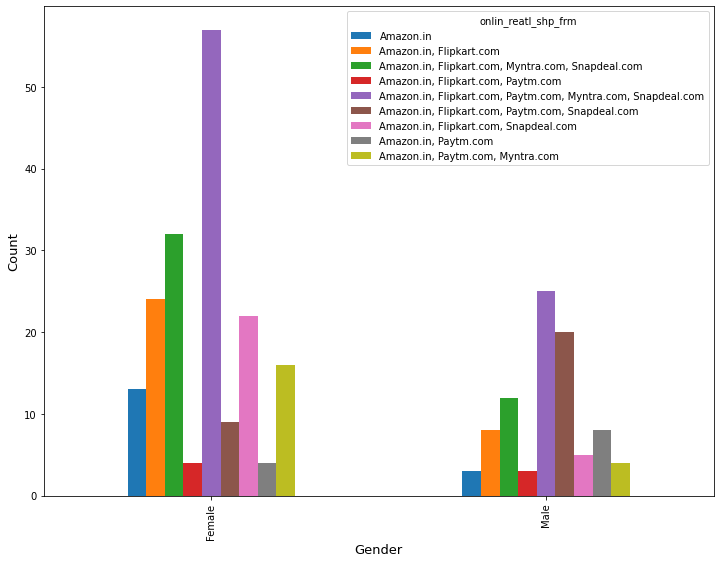

In [48]:
pd.crosstab(df['Gender'], df['onlin_reatl_shp_frm']).plot.bar(figsize =(12,9))
plt.xlabel('Gender', fontsize = 13)
plt.ylabel('Count', fontsize = 13);

# Observation:
    
people are using all the websites for online purchases for needs and even though they recommend amazon the most.

# Label Encoding

In [49]:
le = LabelEncoder()
df_label = df.copy()

In [50]:
for col in df_label.columns:
    df_label[col] = le.fit_transform(df_label[col])

In [51]:
df_label.head()

,Gender,Age,City,Pin code,Since_shop_on,times_onlin_pur,access_internet,Device,Screen_size,OS,...,longer_tim_to_login,longer_tim_disp_graphics,late_declr_price,lon_page_load_tim,limtd_mode_pay,lon_delvry_period,chnge_in_app_des,disrupt_frm_pag_mov,web_is_eff_bfre,Recommend
0,1,1,2,1,3,2,0,0,3,2,...,0,0,3,5,0,3,2,0,0,6
1,0,0,2,5,3,3,3,2,0,1,...,1,6,7,10,7,5,0,4,1,3
2,0,0,4,23,2,3,1,2,2,0,...,7,6,4,7,0,3,5,6,0,5
3,1,0,6,11,2,5,1,2,2,1,...,9,7,4,8,5,3,1,1,2,1
4,0,0,0,31,1,0,3,2,0,1,...,5,8,5,8,7,3,0,7,6,3


# Checking The Correlation

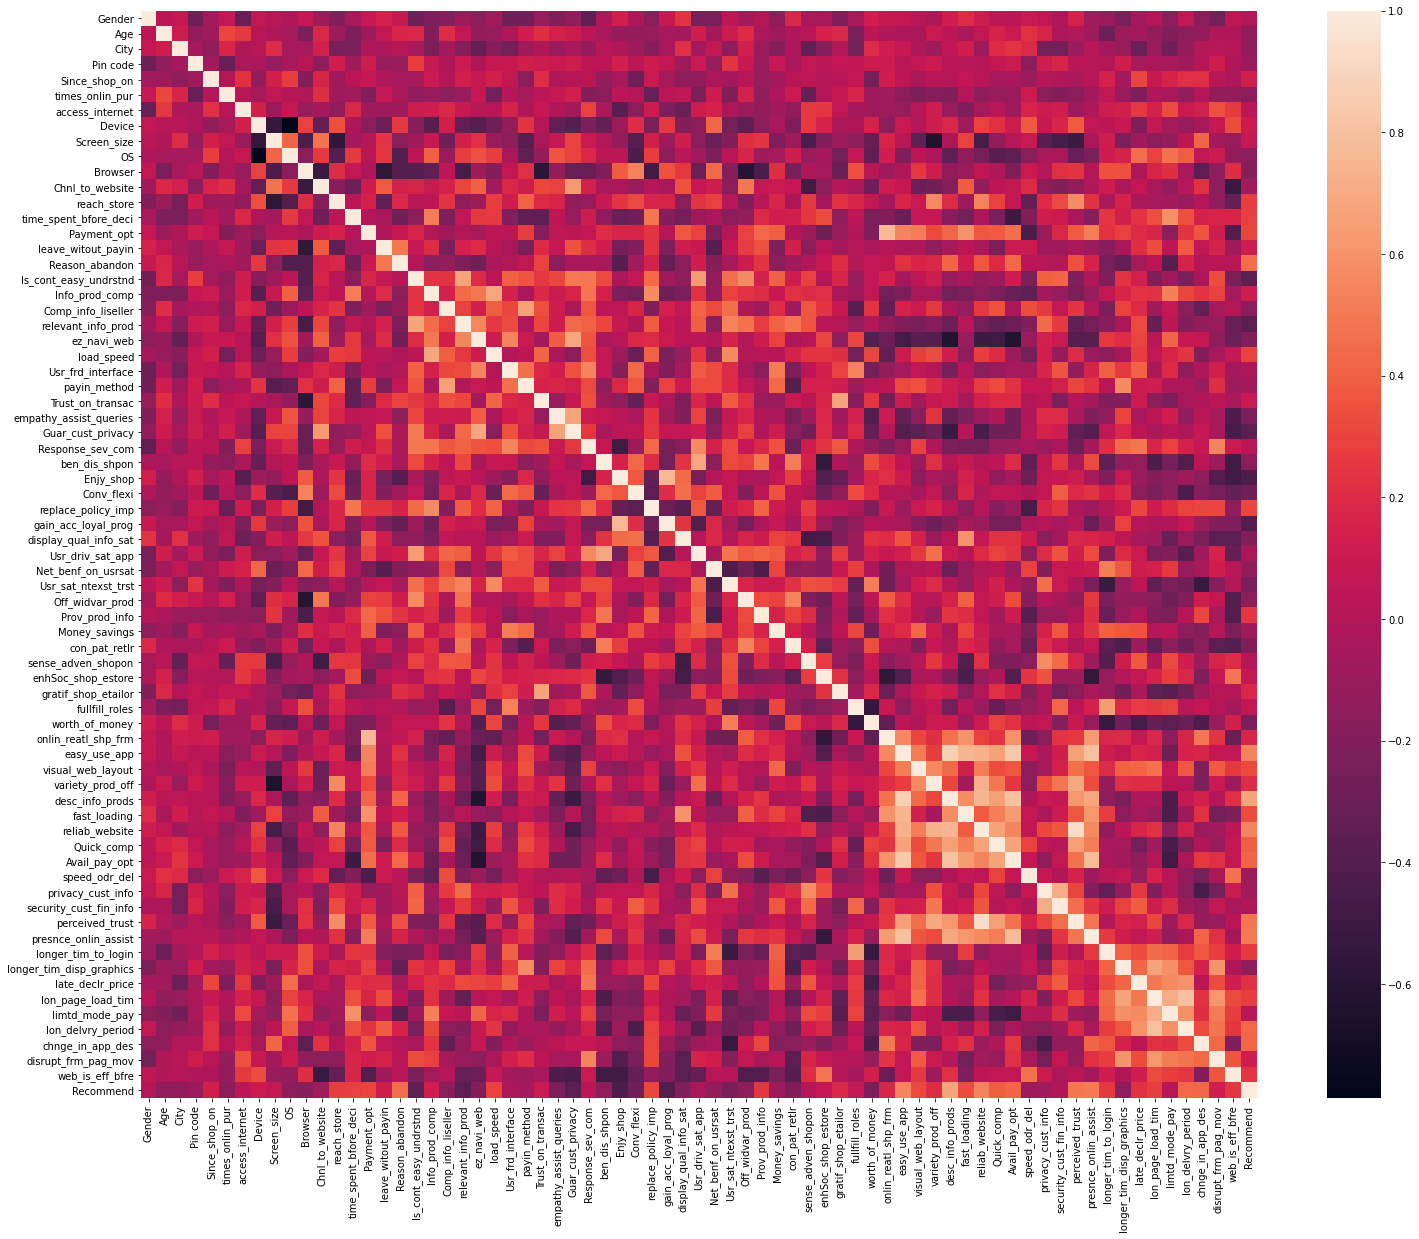

In [52]:
plt.figure(figsize = (25,20))
corr = df_label.corr()
sns.heatmap(corr);

# Observations:
    
We can observe that there are many variables which have high and low correlation with other independent variables.

We have to use correlation matrix to check the relation/dependencies between the independent and target variables.

We have to remove one of the highly correlated independent variable to get rid of the problem of multicollinearity.

In [53]:
corr = df_label.corr().unstack()
c = corr.sort_values(kind = 'quicksort')
c[c.values > 0.7].drop_duplicates()

security_cust_fin_info  privacy_cust_info      0.709004
limtd_mode_pay          lon_page_load_tim      0.712607
variety_prod_off        reliab_website         0.730907
easy_use_app            reliab_website         0.731459
                        fast_loading           0.747567
desc_info_prods         reliab_website         0.751957
Enjy_shop               gain_acc_loyal_prog    0.761451
onlin_reatl_shp_frm     Payment_opt            0.767374
presnce_onlin_assist    Avail_pay_opt          0.769993
                        easy_use_app           0.791192
lon_delvry_period       lon_page_load_tim      0.797480
desc_info_prods         Avail_pay_opt          0.801683
easy_use_app            Avail_pay_opt          0.834385
desc_info_prods         easy_use_app           0.863354
reliab_website          perceived_trust        0.933661
Gender                  Gender                 1.000000
dtype: float64

# The top features which are correlated are shown above.